# HR Analytics Case Study

**Mohsen Boughriou,** 
**Akisha Kaur Manku,**
**Fatemeh Bahmanpour,**
**Sarp Algan,**
**Shivam Kumar,**
**and Archit Rastogi**
| April 2024 

# Table of Contents
* ### Abstract
    * #### Objectives
    * #### Methodolgy and Results
* ### Libraries
* ### Data Loading
* ### Data Overview
* ### Delimitations
    * #### Variables Types and Definitions
* ### Exploratory Data Analysis
    * #### Target Proportion
    * #### Correlation Analysis
* ### Preprocessing
    * #### Encoding Categorical Variables
    * #### Scaling and Skewness
    * #### Train/Test Split
* ### Modelling
* ### Evaluation
* ### Forecasting
* ### Saving the Model and other Necessary files

## Abstract

#### 1- Objectives

This project aims to model the probability of attrition of each employee from the HR Analytics Dataset, which was provided by our client, Pietro Nicolaus Roselli Lorenzini. Its conclusions will allow the management to know the probability of an employee to quit the company based on various factors.

**2- Methodology and Results**

To gain deeper insights into the data and understand the interplay between various features, we commence with Exploratory Data Analysis (EDA). This step allows us to uncover patterns and relationships within the data. Following EDA, we prepare the raw data for the modeling process by cleaning and formatting it appropriately.

Transitioning to the modeling phase, we constructed a neural network featuring 3 hidden layers and an output layer employing a softmax activation function for predicting probabilities of each class. Leveraging the PyTorch library, our model exhibited promising outcomes, demonstrating an impressive 96% accuracy on the test set, indicative of its robust performance.

**3- Delimitations**

1- Imbalanced Classes: The dataset contains imbalanced classes.

2- Feature Scope: The project's analysis is restricted to available features, potentially limiting predictive performance without access to additional relevant features.

3- Model Constraints: Model selection is confined to algorithms compatible with the dataset, potentially restricting exploration of alternative models or ensemble methods.

4- Ethical Considerations: Ethical implications of the model's predictions, particularly in sensitive domains like HR analytics, must be carefully considered to ensure responsible use.


### Libraries

This project uses a set of libraries for data manipulation, plotting and modelling. We start by importing them.

# --

In [1]:
# Loading Libraries
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting
sns.set(style='white')

from sklearn import preprocessing #Preprocessing
from sklearn.preprocessing import StandardScaler #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation

# For Modelling 
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import joblib


### Data Loading

The dataset is stored in the the local machine as a CSV file: `HR.csv`. The file is loaded now.

In [2]:
# Reading Dataset from the local machine
hr = pd.read_csv('./HR.csv')

hr = pd.read_csv('./HR.csv')
hr.columns = [col.lower() for col in hr.columns]
if 'sales' in hr.columns.tolist():
    hr.rename(columns={'sales': 'department'}, inplace=True)

if 'promotion_last_5years' in hr.columns.tolist():
    hr.rename(columns={'promotion_last_5years': 'promotion_last_years'}, inplace=True)

if 'average_montly_hours' in hr.columns.tolist():
    hr.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
    
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


---

## Data Preparation

### Variables Types and Definitions

The first stage of this analysis is to describe the dataset, understand the meaning of variable and perform the necessary adjustments to ensure that the data will be proceeded correctly during the modelling phase.

In [3]:
# Shape of the data frame
print('Number of Rows:', hr.shape[0], '| Number of Columns:', hr.shape[1])

Number of Rows: 14999 | Number of Columns: 10


In [4]:
# Describe each variable in the dataset 
def df_desc(df):
    import pandas as pd
    desc = pd.DataFrame({'dtype': df.dtypes,
                         'NAs': df.isna().sum(),
                         'Numerical': (df.dtypes != 'object') & (df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() != len(df)),
                         'Boolean': df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() == len(df),
                         'Categorical': df.dtypes == 'object',
                        })
    return desc

df_desc(hr)

,dtype,NAs,Numerical,Boolean,Categorical
satisfaction_level,float64,0,True,False,False
last_evaluation,float64,0,True,False,False
number_project,int64,0,True,False,False
average_monthly_hours,int64,0,True,False,False
time_spend_company,int64,0,True,False,False
work_accident,int64,0,False,True,False
left,int64,0,False,True,False
promotion_last_years,int64,0,False,True,False
department,object,0,False,False,True
salary,object,0,False,False,True


The dataset comprises 14,999 rows and 10 columns, with each row representing an employee and each column denoting a specific employee attribute. There are no missing values (NA) present in any of the attributes. Among these attributes, two (2) contain decimal numbers, three (3) contain integers, three (3) contain boolean values, and two (2) contain categorical values.

In [5]:
# Summarize numercial variables
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The dataframe includes 10 variables with no missing values:

- `satisfaction_level`: numerical, decimal values between 0 and 1.  
  *Employee satisfaction level, from 0 to 1.*
  
  
- `last_evaluation`: numerical, decimal values between 0 and 1.  
  *Employee last evaluation score, from 0 to 1.*


- `number_project`: numerical, integer values between 2 and 7.  
  *Number of projects handled by the employee.*


- `average_montly_hours`: numerical, integer values between 96 and 310.  
  *Average monthly hours worked by the employee.*
  
  
- `time_spend_company`: numerical, integer values between 2 and 10.  
  *Number of years spent in the company by the employee.*
  
  
- `work_acident`: encoded categorical, boolean.  
  *Flag indicating if the employee had a work accident.*
  
  
- `left`: encoded categorical, boolean.  
  *Flag indicating if the employee has left the company. This is the __target variable__ of the study, the one to be modelled.*
  
  
- `promotion_last_5years`: encoded categorical, boolean.  
  *Flag indicating if the employee has been promoting within the past 5 years.*


- `department`: categorical, 10 values. 
  *Department of the employee: Sales, Accounting, HR, Technical, Support, Management, IT, Product Management, Marketing, R&D.*
  
  
- `salary`: categorical, 3 values.  
  *Salary level of the employee: Low, Medium, High.*

In [6]:
# Lists values of categorical variables
categories = {'department': hr['department'].unique().tolist(),
 'department':hr['department'].unique().tolist()}
for i in sorted(categories.keys()):
    print(i+":")
    print(categories[i])
    if i != sorted(categories.keys())[-1] :print("\n")

department:
['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']


The variable `sales` seems to represent the company departments. Thus, it will be renamed as `department`.

### Exploratory Data Analysis

#### Target Variable

The objective of this study is to build a model to predict the value of the variable `left`, based on the other variables available. To predict whether an employee will leave the company or not

In [7]:
# Value counts of each values in left
hr['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

**23.8% of the employees listed in the dataset have left the company.**  
Examining the means of the variables can reveal distinctions between employees who left from the company and those who remained.

In [8]:
# Get the mean of each variable for the different values of left

relevant_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company',
                    'work_accident', 'left', 'promotion_last_years']

# Group by 'left' and calculate the mean
mean_by_left = hr[relevant_columns].groupby('left').mean()
mean_by_left

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left the company have:
- **a lower satisfaction level:** 0.44 vs 0.67.
- **higher average monthly working hours:** 207 vs 199.
- **a lower work accident ratio:** 0.05 vs 0.18.
- **a lower promotion rate:** 0.01 vs 0.03.

#### Correlation Analysis

A correlation analysis will allow to identify relationships between the dataset variables. A plot of their distributions highlighting the value of the target variable might also reveal some patterns.

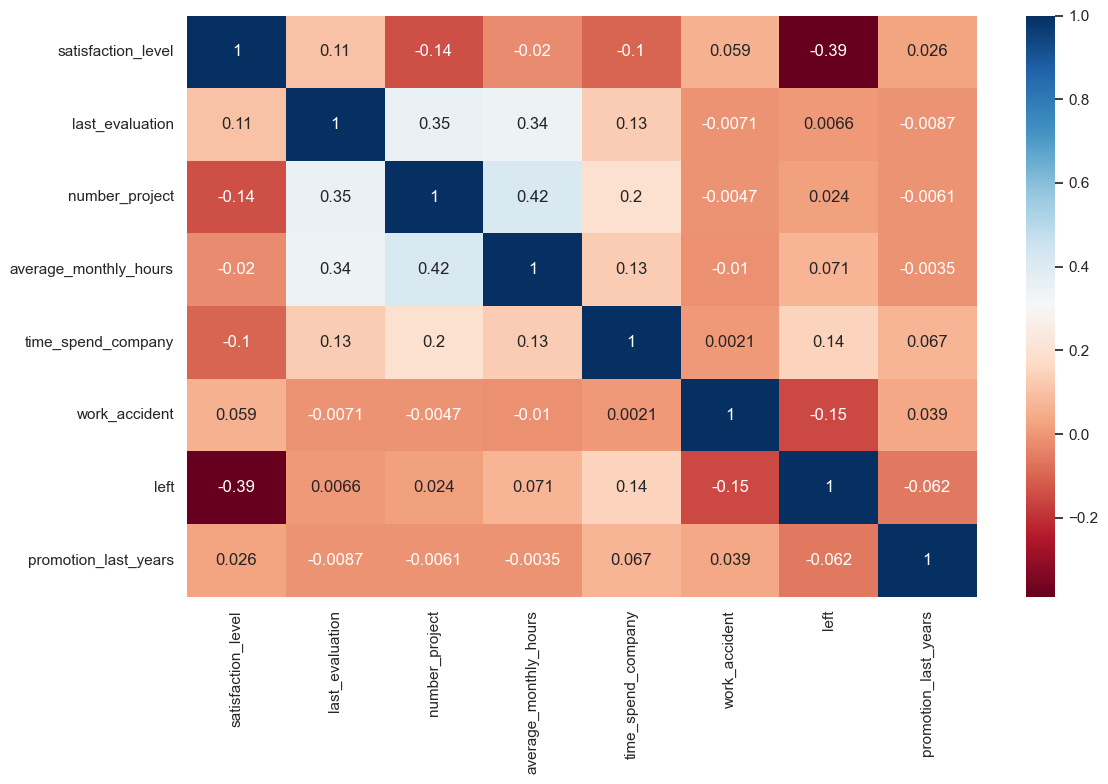

In [9]:
# Correlation Matrix
relevant_columns = hr[['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_monthly_hours', 'time_spend_company',
                    'work_accident', 'left', 'promotion_last_years']]

plt.figure(figsize=(12,8))
sns.heatmap(relevant_columns.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

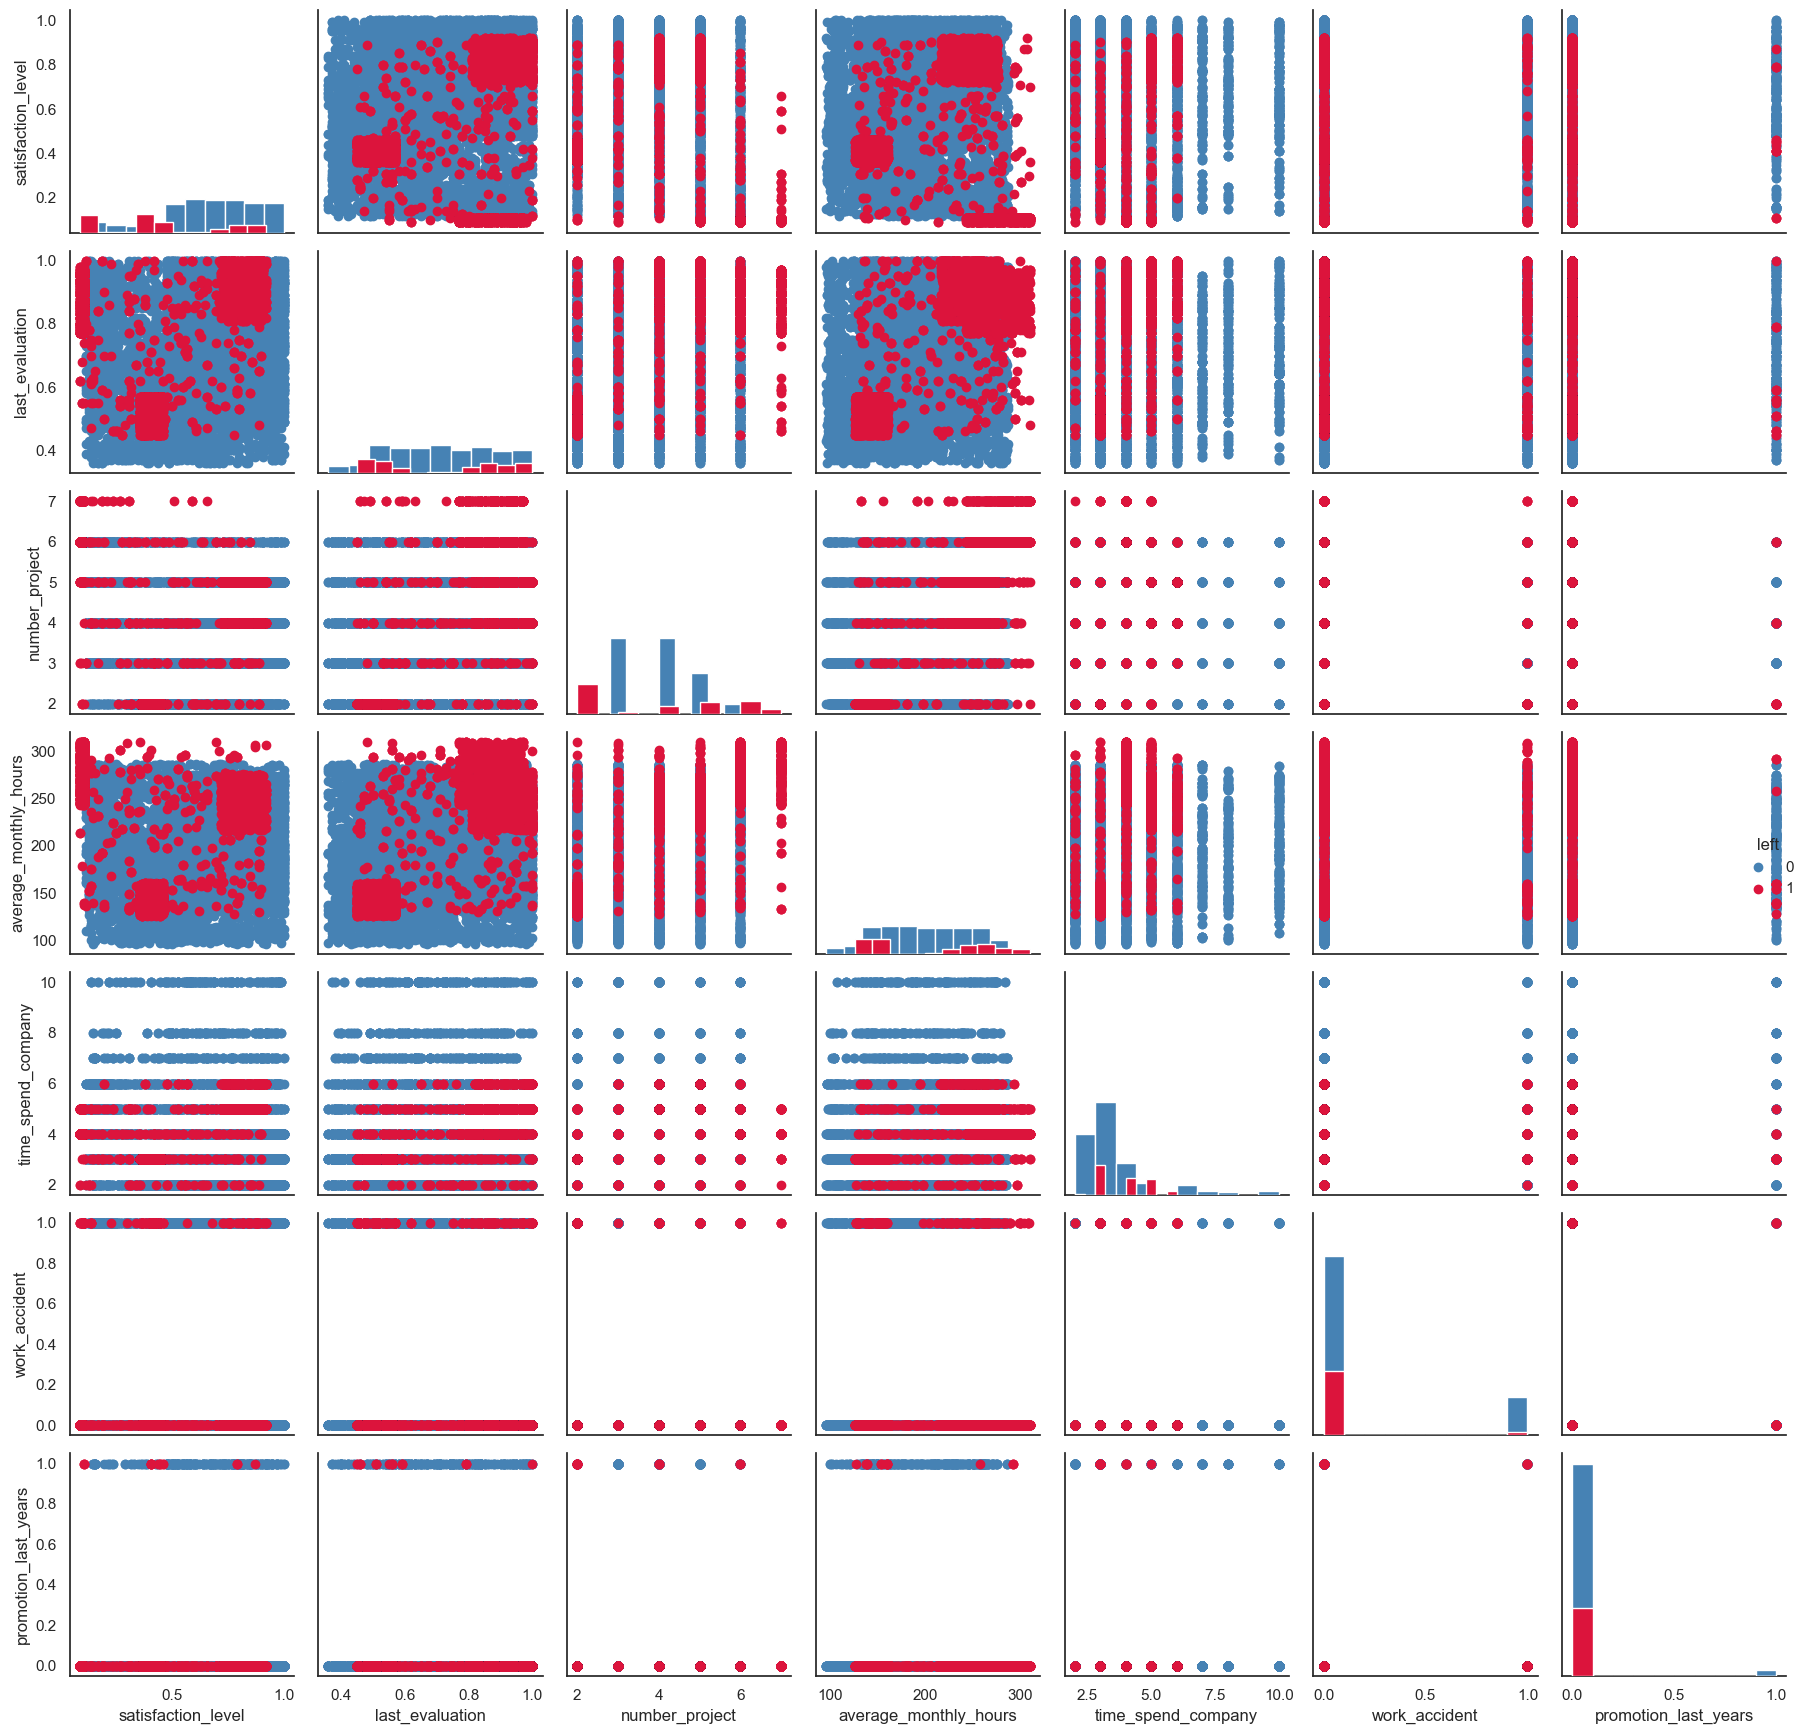

In [10]:
# Pair Plot
plot = sns.PairGrid(hr, hue='left', palette=('steelblue', 'crimson'))
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot.add_legend()
plt.tight_layout()

No strong correlation appears in the dataset. However:
- `number_project` and `average_monthly_hours` have a **moderate positive** correlation (0.42).
- `left` and `satisfaction_level` have a **moderate negative** correlation (-0.39).
- `last_evaluation` and `number_project` have a **moderate positive** correlation (0.35).
- `last_evaluation` and `average_monthly_hours` have a **moderate positive** correlation (0.34).

#### Turnover by Salary Levels

In [11]:
# Salary Levels proportions and turnover rates
print('Salary Levels proportions')
print(hr['salary'].value_counts()/len(hr)*100)
print('\n')
print('Turnover Rate by Salary level')
print(hr.groupby('salary')['left'].mean())

Salary Levels proportions
salary
low       48.776585
medium    42.976198
high       8.247216
Name: count, dtype: float64


Turnover Rate by Salary level
salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


The salary level appears to **significantly influence** employee turnover. Employees with higher salaries tend to stay in the company (7% turnover), while those with lower salaries are more likely to leave (30% turnover).

#### Turnover by Departments

In [12]:
# Departments proportions
hr['department'].value_counts()/len(hr)*100

department
sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: count, dtype: float64

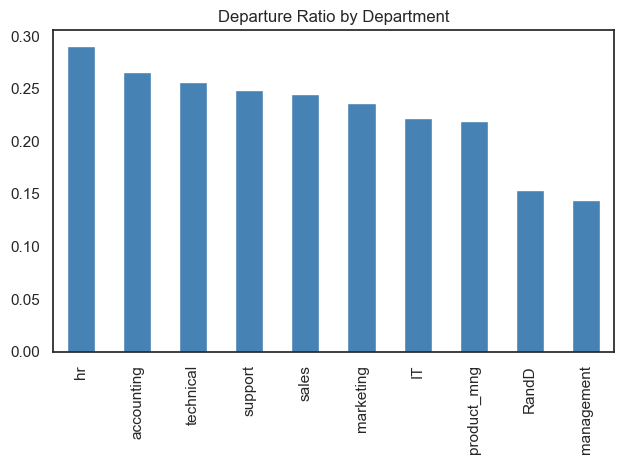

In [13]:
# Turnover Rate by Department
hr.groupby('department')['left'].mean().sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Departure Ratio by Department')
plt.xlabel('')
plt.tight_layout()

Some observations can be inferred:
- Departure rate differs depending on the department, but **no clear outlier is detected**.
- HR has the **highest turnover rate**.
- R&D and Management have a **significantly lower turnover rate**.

#### Turnover by Satisfaction Level

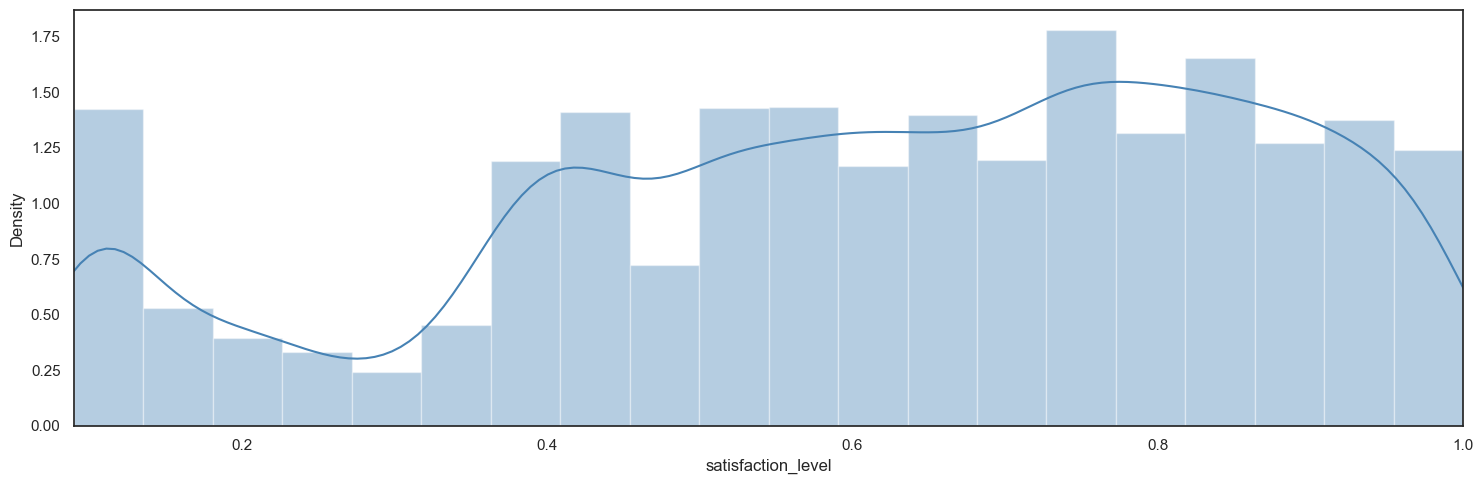

In [14]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.satisfaction_level,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.satisfaction_level),max(hr.satisfaction_level))
plt.tight_layout()

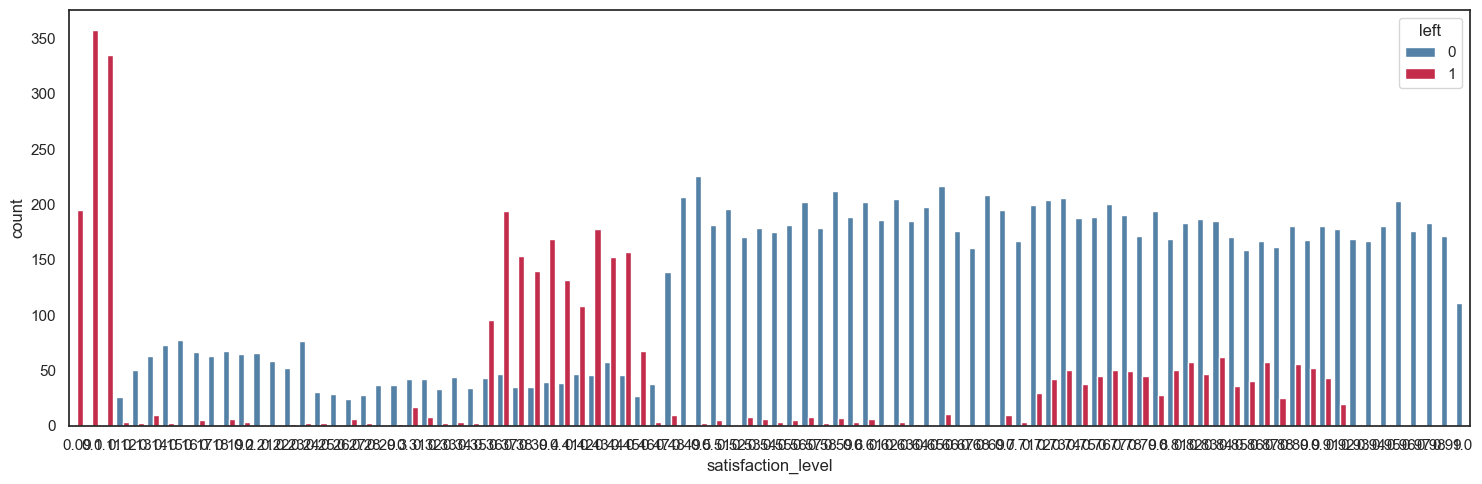

In [15]:
# Bar Plot with left values

plt.figure(figsize=(15,5))
sns.countplot(x=hr['satisfaction_level'], hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout()

The Satisfaction Level shows 3 interesting areas:
- Employees leave the company *below 0.12*.
- There is a **high rate of departure between 0.36 and 0.46**.
- Turnover rate is **higher between 0.72 and 0.92**.

Employees with very low satisfaction level obviously leave the company. The risky zone is when employees rates their satisfaction just below 0.5. They also tend to leave the company when they become moderately satisfied.

#### Turnover by Last Evaluation

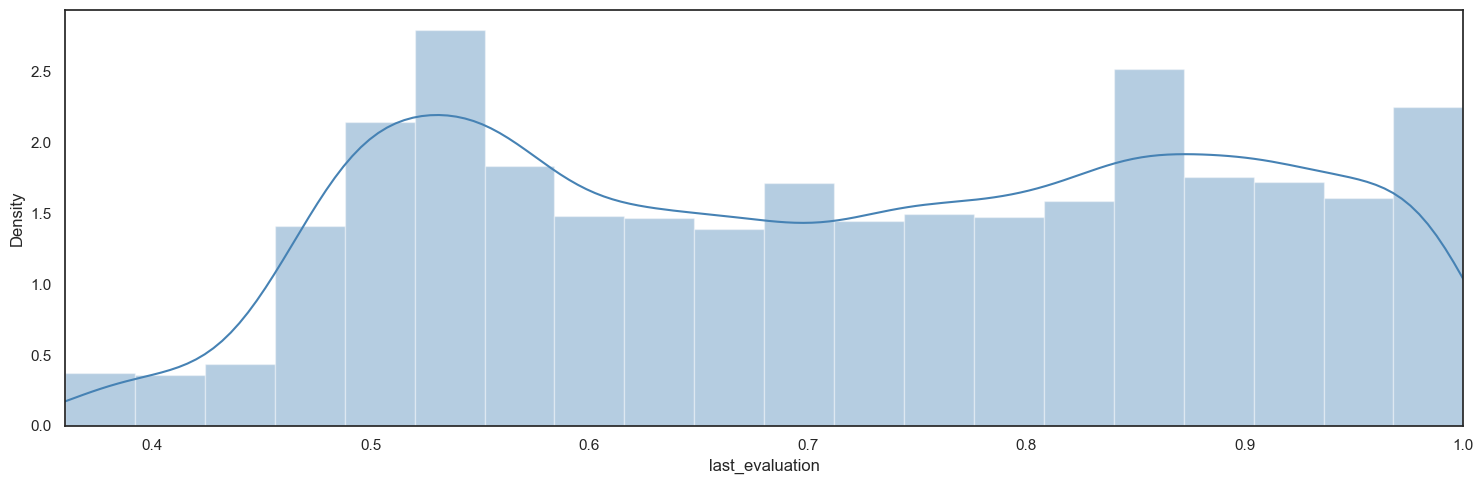

In [16]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.last_evaluation,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.last_evaluation),max(hr.last_evaluation))
plt.tight_layout()

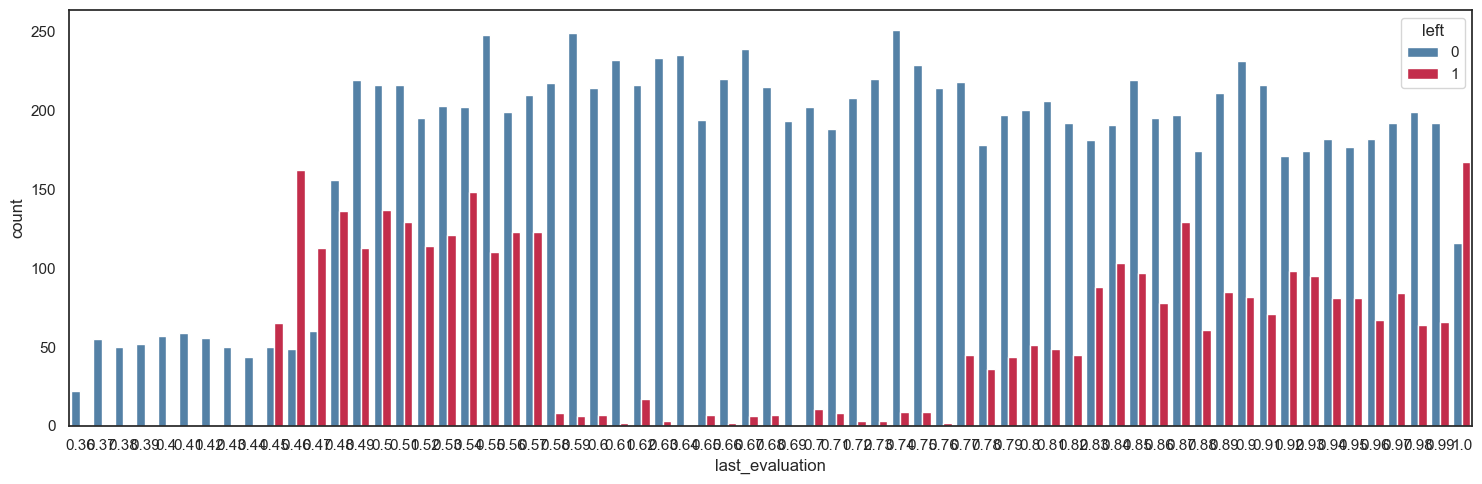

In [17]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(x=hr['last_evaluation'], hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout()

The Last Evaluation shows 2 interesting areas:
- Turnover rate is **higher between 0.45 and 0.57**.
- Turnover rate is **higher above 0.77**.

Employees with low evaluation scores obtained their last evaluation tend to leave the company. A large number of good employees leave the company, maybe to get a better opportunity. Interestingly, the ones with very low scores seem to stay.

#### Turnover by Number of Projects

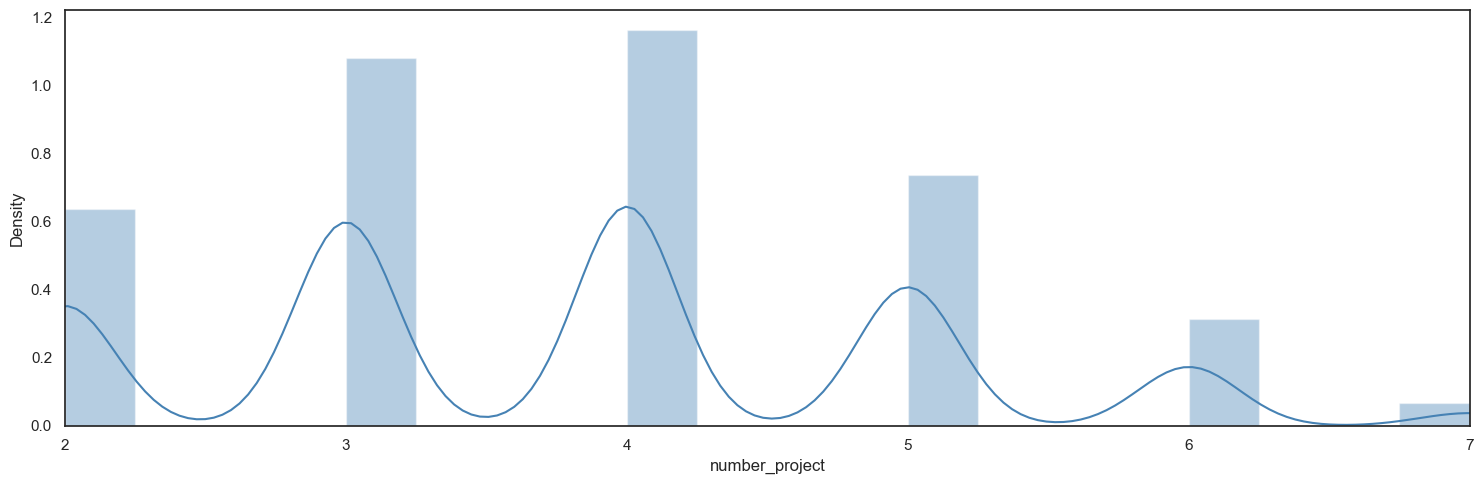

In [18]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.number_project,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.number_project),max(hr.number_project))
plt.tight_layout()

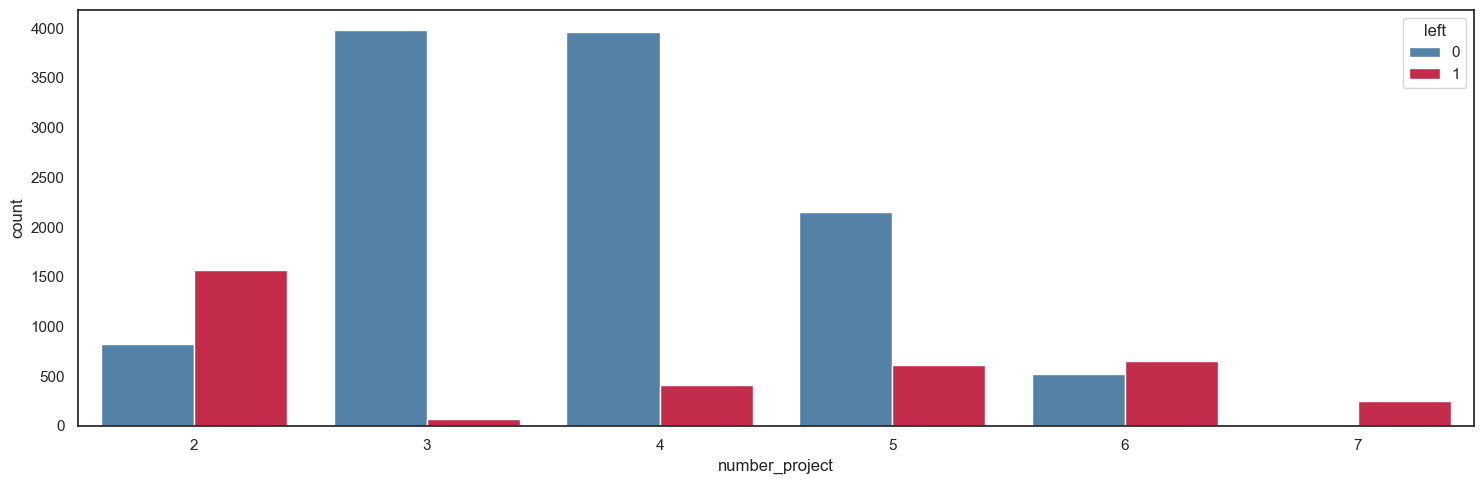

In [19]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(x=hr['number_project'], hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout()

The main observation regarding the number of projects is that employees with **only 2 or more than 5 projects** have a higher probability to leave the company.

#### Turnover by Average Monthly Hours

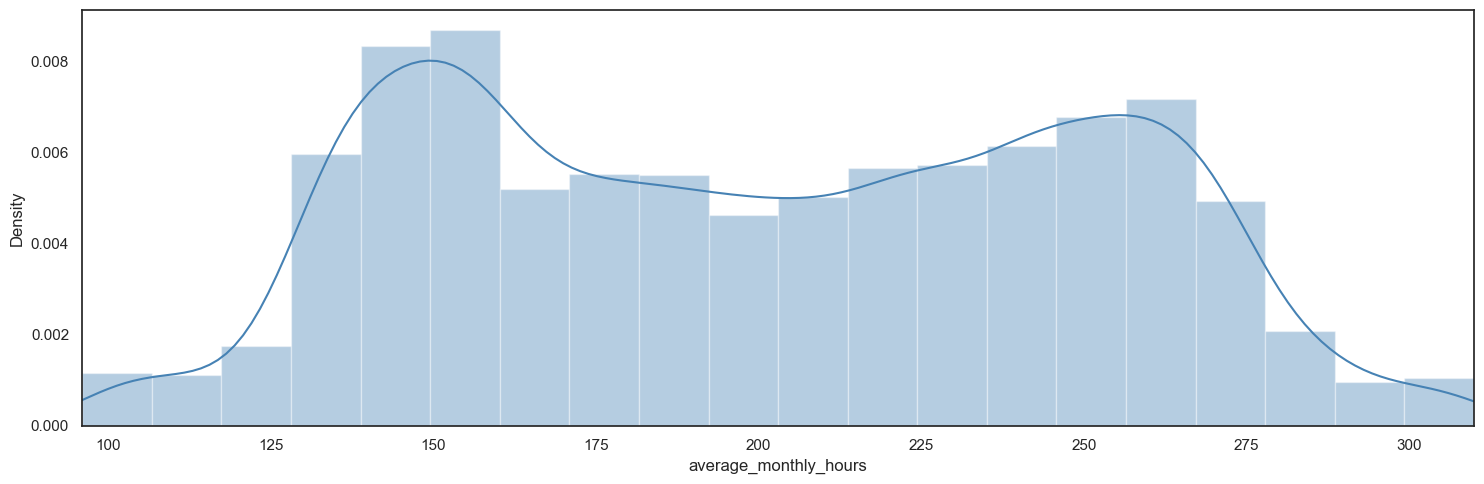

In [20]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(hr.average_monthly_hours,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.average_monthly_hours),max(hr.average_monthly_hours))
plt.tight_layout()

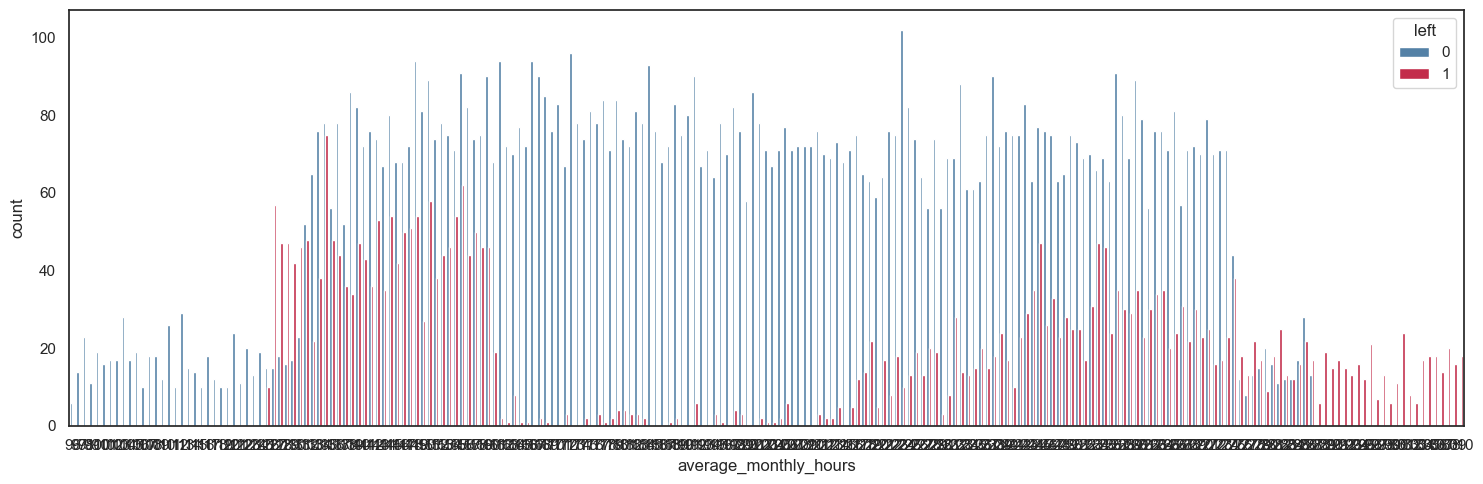

In [21]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(x=hr.average_monthly_hours, hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout()

The Average Monthly Hours shows 5 interesting areas:
- Turnover rate is **0% below 125 hours**.
- Turnover rate is **high between 126 and 161 hours**.
- Turnover rate is **moderate between 217 and 274 hours**.
- Turnover rate is **roughly around 50% between 275 and 287 hours**.
- Turnover rate is **100% above 288 hours**.

Employees with really low numbers of hours per month (below 125) tend to stay in the company, whereas employees working too many working hours (above 275 hours) have a high probability to leave the company. **A 'safe' range is between 161 and 217 hours**, which seems to be ideal for employees to remain in the company.

#### Turnover by Time Spent in the Company

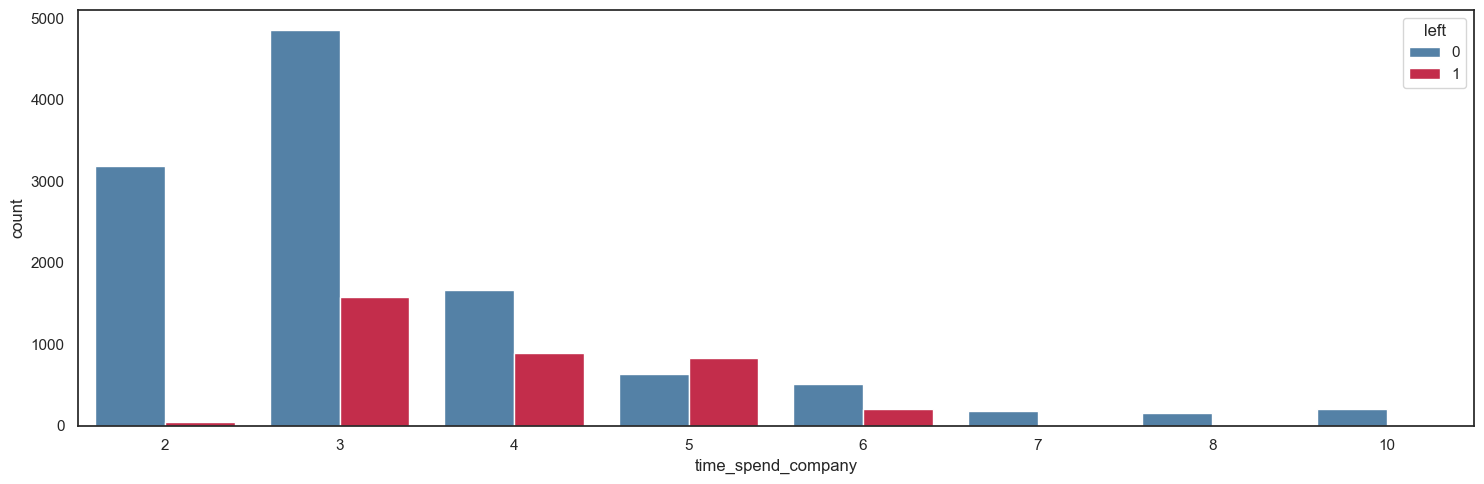

In [22]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(x=hr.time_spend_company, hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout()

It seems that employees with **3-6 years of services** are leaving the company.

#### Turnover by Work Accident

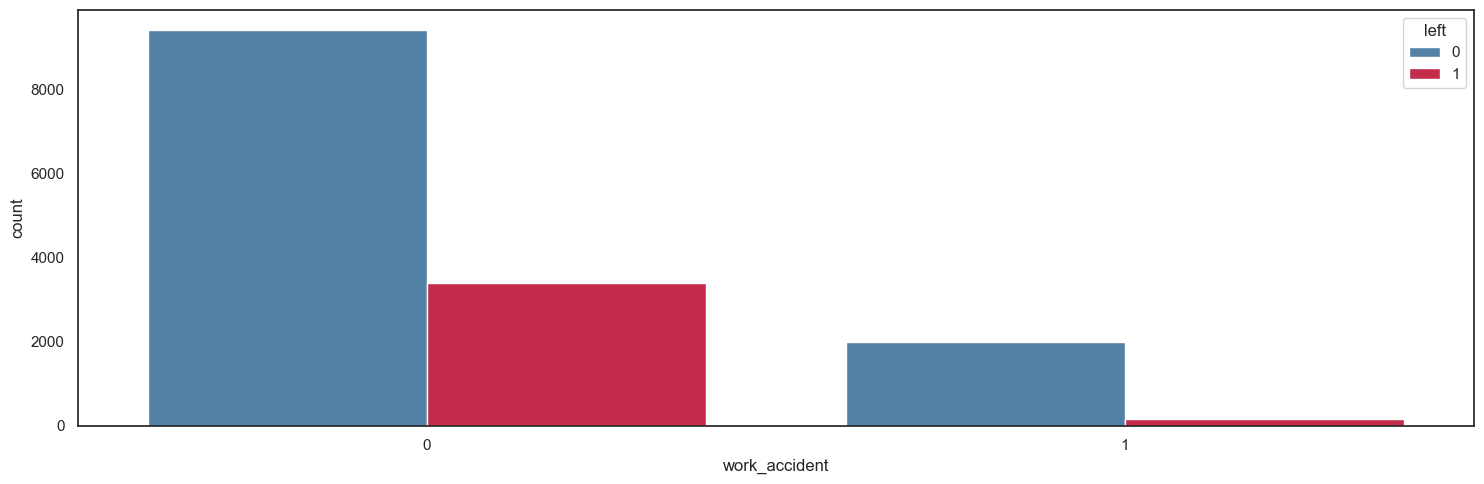

In [23]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(x=hr.work_accident, hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout()

Employees with a work accident tend to stay in the company.

#### Turnover by Promotion within the past 5 years

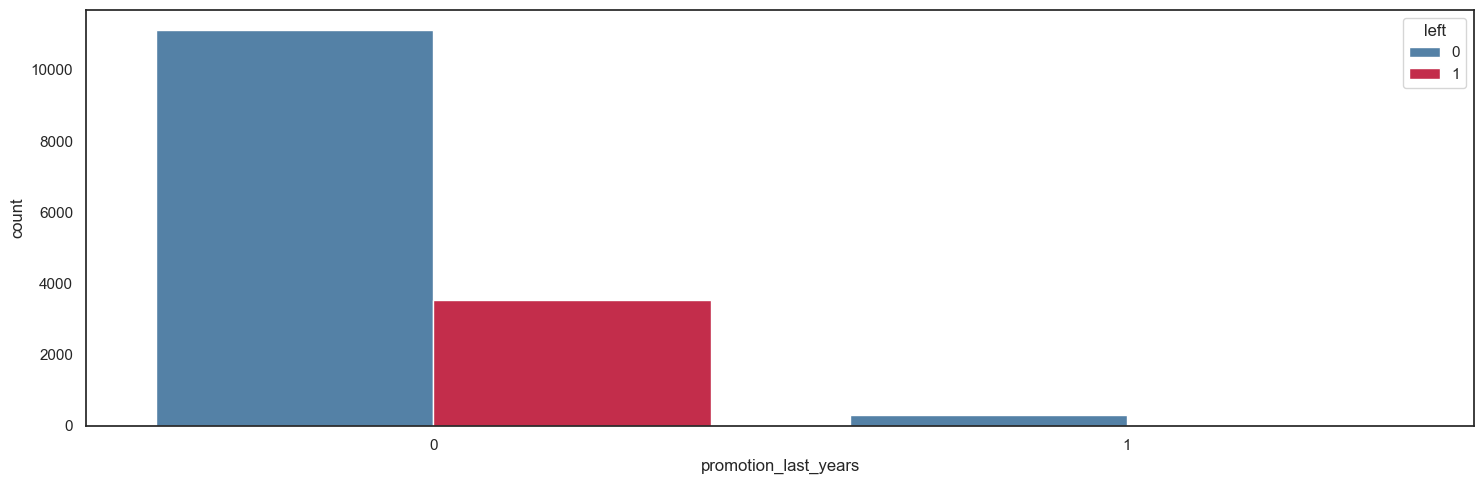

In [24]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(x=hr.promotion_last_years, hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout() 

In [25]:
print('Turnover Rate if Promotion:', round(len(hr[(hr['promotion_last_years']==1)&(hr['left']==1)])/len(hr[(hr['promotion_last_years']==1)])*100,2),'%')
print('Turnover Rate if No Promotion:', round(len(hr[(hr['promotion_last_years']==0)&(hr['left']==1)])/len(hr[(hr['promotion_last_years']==0)])*100,2),'%')

Turnover Rate if Promotion: 5.96 %
Turnover Rate if No Promotion: 24.2 %


It appears that employees with a promotion within the past 5 years have less propensity to leave the company.

#### Number of Projects vs Average Monthly Hours

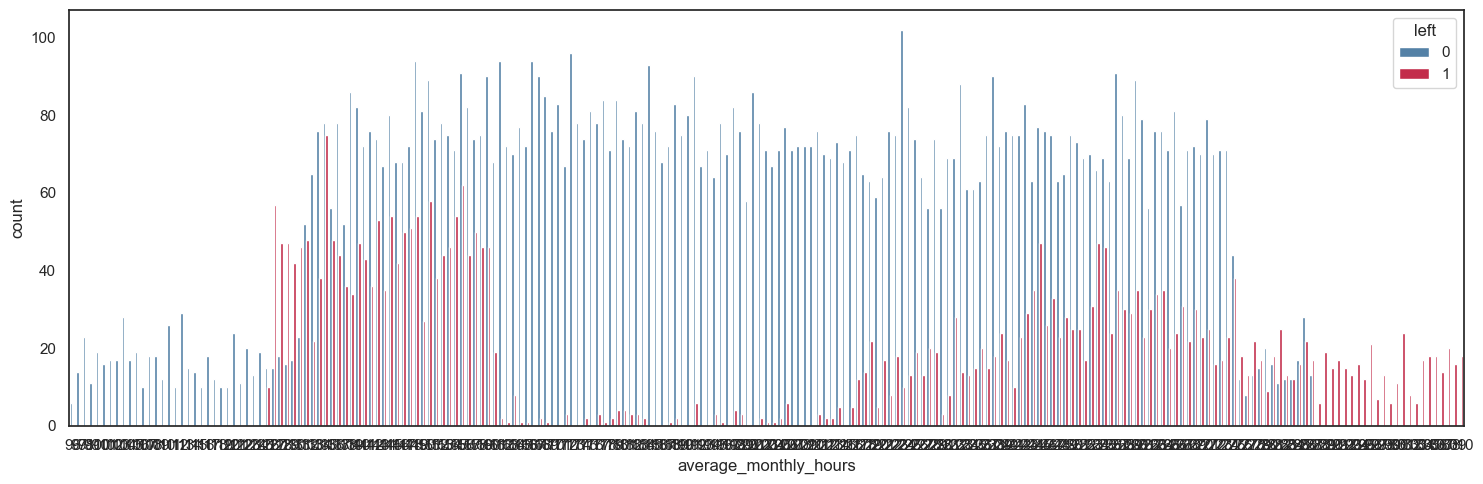

In [26]:
# Bar Plot with left values

plt.figure(figsize=(15,5))
sns.countplot(x=hr.average_monthly_hours, hue=hr['left'], palette=('steelblue', 'crimson'))
plt.tight_layout()

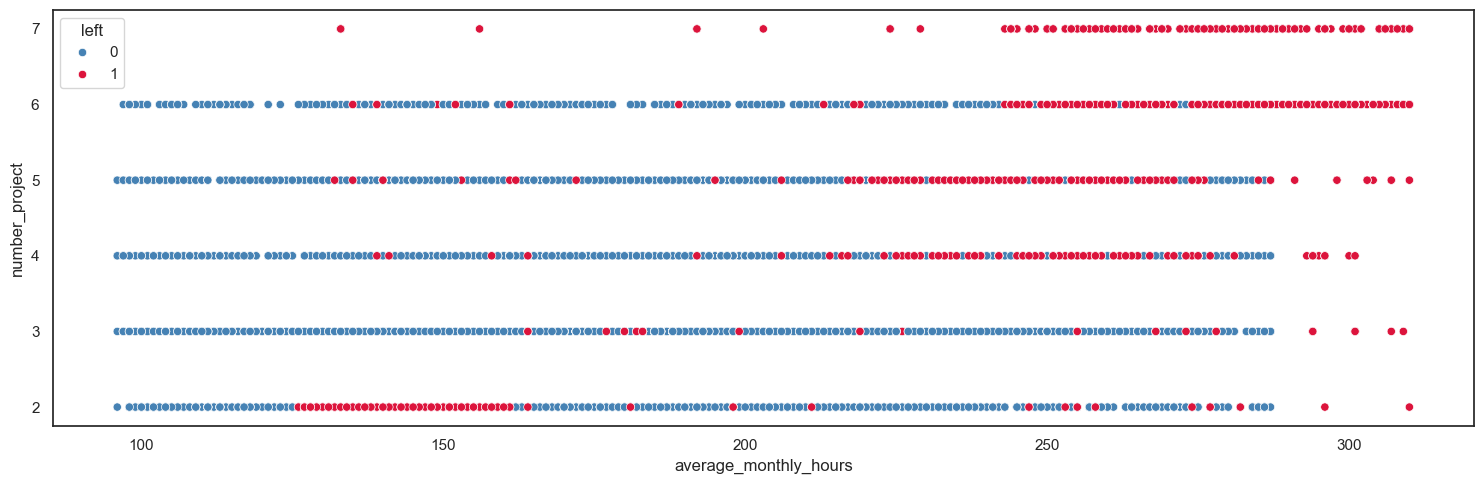

In [27]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr.average_monthly_hours,
            y=hr.number_project,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

It appears that:
- employees with **more than 4 projects** and working **more than 217 hours** tend to quit the company.
- employees with **less than 3 projects** and working **less than 161 hours** tend to quit the company.

A high or a low workload seem to push employees out.

#### Number of Projects vs Last Evaluation

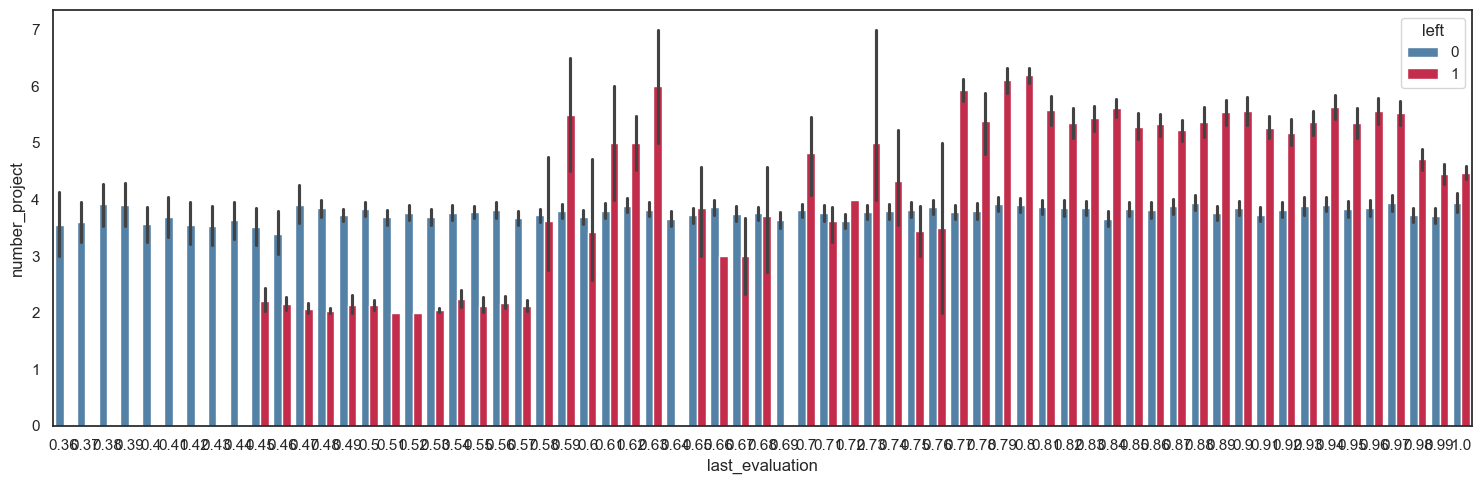

In [28]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=hr.last_evaluation,
            y=hr.number_project,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()



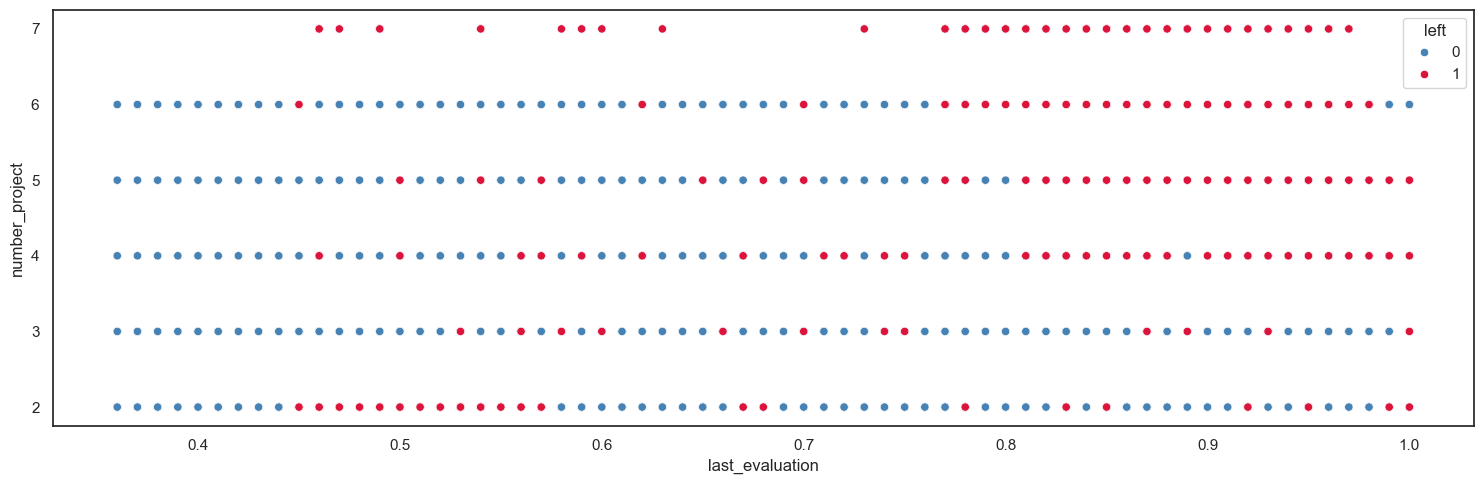

In [29]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr.last_evaluation,
            y=hr.number_project,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with **more than 4 projects** seem to have **higher evaluations** but leave the company. Employees with **2 projects and a low evaluation** leave the company. 

#### Last Evaluation vs Average Monthly Hours

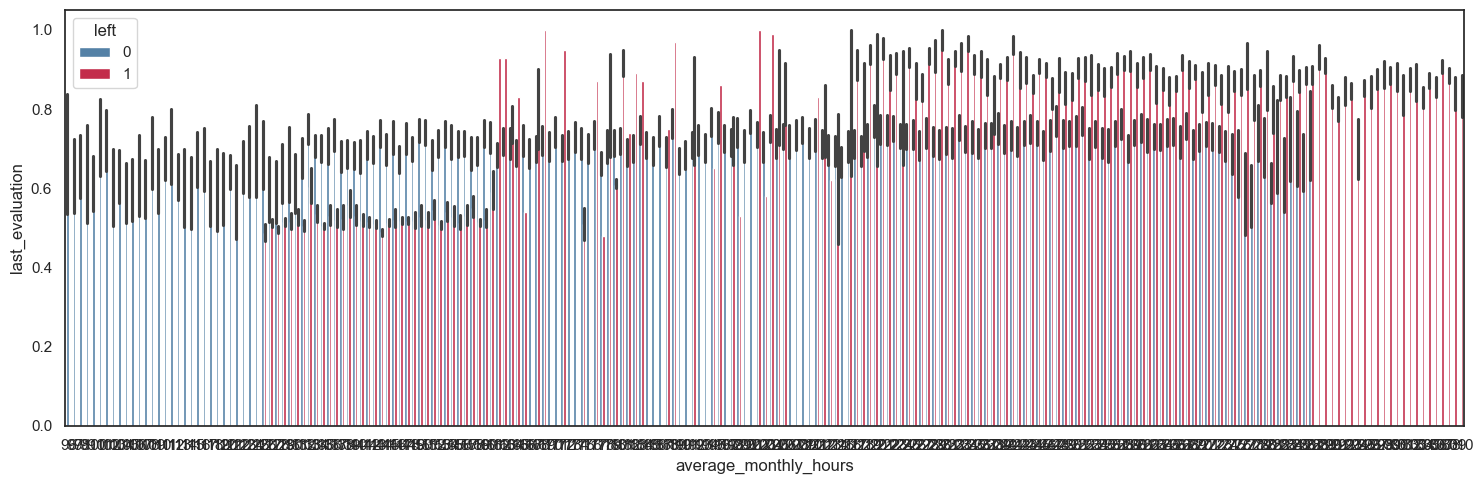

In [30]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=hr.average_monthly_hours,
            y=hr.last_evaluation,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

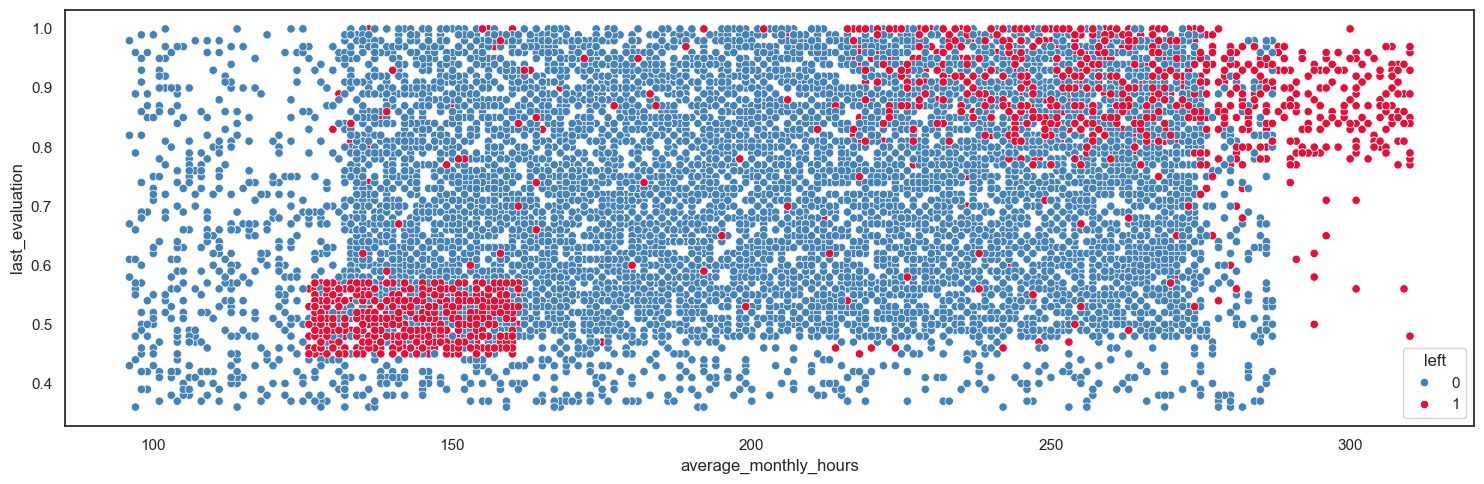

In [31]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr.average_monthly_hours,
            y=hr.last_evaluation,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with **high evaluation** and working **more than 217 hours** tend to leave the company. Wheras employees with **evaluation around 0.5** and working **between 125 and 161 hours** tend to leave the company.

#### Last Evaluation vs Satisfaction Level

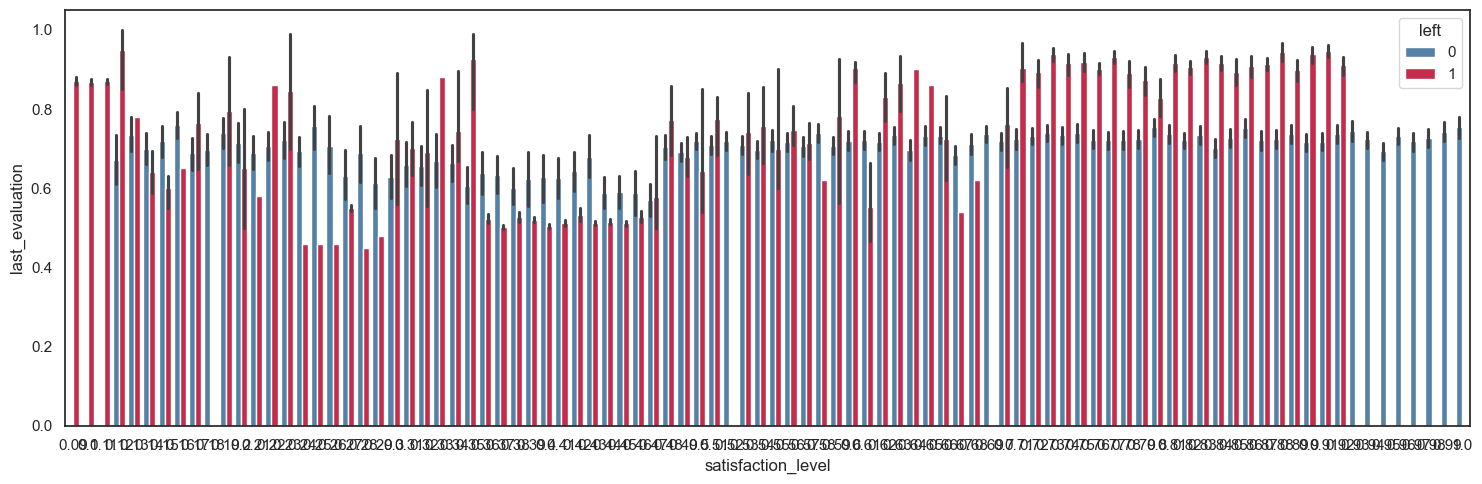

In [32]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=hr.satisfaction_level,
            y=hr.last_evaluation,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

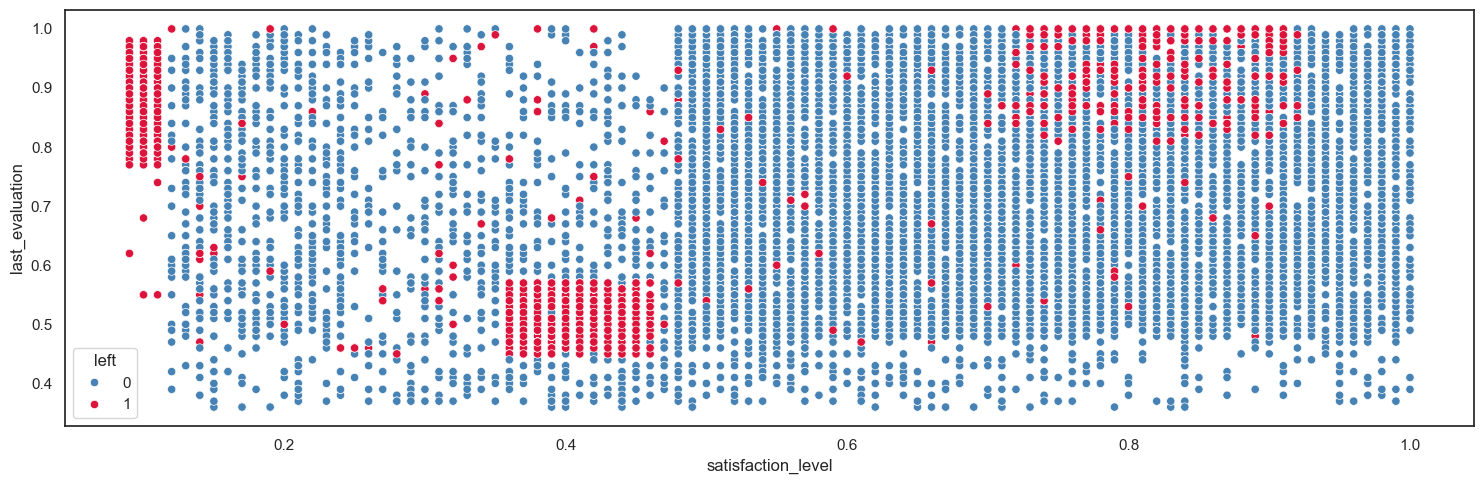

In [33]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=hr.satisfaction_level,
            y=hr.last_evaluation,
            hue=hr.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with **satisfaction level below 0.11** tend to leave the company. Employees with **satisfaction level between 0.35 and 0.46** and with **last evaluation between 0.44 and 0.57** tend to leave the company. Employees with **satisfaction level between 0.71 and 0.92** and with **last evaluation between 0.76 and 1** tend to leave the company.

### Encoding Categorical Variables

The variable `salary` will be encoded using ordinal encoding and `department` will be encoded using one-hot encoding.

In [34]:
# Encoding the variable salary
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
hr['salary'] = hr['salary'].map(salary_mapping)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [35]:
# Perform one-hot encoding
hr_encoded = pd.get_dummies(hr, columns=['department'])

In [36]:
# Convert bool columns to integers
for column in hr_encoded.select_dtypes(include=['bool']).columns:
    hr_encoded[column] = hr_encoded[column].astype(int)

# --

In [37]:
hr_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
df_desc(hr_encoded)

,dtype,NAs,Numerical,Boolean,Categorical
satisfaction_level,float64,0,True,False,False
last_evaluation,float64,0,True,False,False
number_project,int64,0,True,False,False
average_monthly_hours,int64,0,True,False,False
time_spend_company,int64,0,True,False,False
work_accident,int64,0,False,True,False
left,int64,0,False,True,False
promotion_last_years,int64,0,False,True,False
salary,int64,0,True,False,False
department_IT,int32,0,False,True,False


In [39]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


### Training/Test Split

The model target `left` is defined, taking all other variables as features. The dataset is split in a train set and a test set, using a random split with ratio 90|10.

To ensure that the training and testing sets have the same distribution as the original dataset, we use stratified sampling. This will enable the split to have the same proportion of classes as the original dataset.

In [40]:
target = 'left'

def split_dataset(df, target, split_ratio=0.1, seed=806):
    features = df.columns.tolist()
    features.remove(target)

    X = df[features]
    y = df[[target]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=seed, stratify=y)

    return X, y, X_train, X_test, y_train, y_test

X, y, X_train_, X_test_, y_train, y_test = split_dataset(hr_encoded, target)

print('Features:',X.shape[0], 'items | ', X.shape[1],'columns')
print('Target:',y.shape[0], 'items | ', y.shape[1],'columns\n')
print('Features Train:',X_train_.shape[0], 'items | ', X_train_.shape[1],'columns')
print('Features Test:',X_test_.shape[0], 'items | ', X_test_.shape[1],'columns\n')
print('Target Train:',y_train.shape[0], 'items | ', y_train.shape[1],'columns')
print('Target Test:',y_test.shape[0], 'items | ', y_test.shape[1],'columns')

Features: 14999 items |  18 columns
Target: 14999 items |  1 columns

Features Train: 13499 items |  18 columns
Features Test: 1500 items |  18 columns

Target Train: 13499 items |  1 columns
Target Test: 1500 items |  1 columns


### Scaling The Dataset

Scaling ensures uniformity and convergence efficiency in neural networks by normalizing feature scales, aiding gradient descent and regularization, and optimizing performance. 

In [41]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)

The dataset is pre-processed now and ready to go through the next phases.

---

## Modelling

In [42]:
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).unsqueeze(1)

# Convert to PyTorch tensors
#X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
#y_train_tensor = torch.tensor(y_train.values.squeeze(), dtype=torch.float32)  
#y_test_tensor = torch.tensor(y_test.values.squeeze(), dtype=torch.float32)

#Create Tensor datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

A neural network comprising three hidden layers (50, 17, and 5 neurons, respectively) followed by a single neuron output layer, employing ReLU activation for the hidden layers and a softmax activation for the output, designed for multi class classification tasks.

In [43]:
# Model class for multi-class classification with softmax
class ClassificationModel(nn.Module):
    def __init__(self, n_features):
        super(ClassificationModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(n_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.network(x)
    

In [44]:
# Model instance with correct number of features and classes
n_features = X_train.shape[1]  # Number of input features

model = ClassificationModel(n_features)
model.to(device)

criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 300

def train_model(num_epochs, model, train_loader, optimizer, criterion, device):
    loss_history = []
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()  # Clear gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs.view_as(targets), targets)  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Gradient update

        # Store loss for analysis
        loss_history.append(loss.item())
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

    return loss_history

# Training loop
loss_history = train_model(epochs, model, train_loader, optimizer, criterion, device)


NameError: name 'device' is not defined

In [ ]:
##### FIX THE BELOW LINE

The training history depicts a progressive reduction in loss over 400 epochs, starting at 0.7266 and steadily decreasing to 0.3502, indicating effective convergence. The model, trained with categorical cross-entropy loss and Adam optimizer with a learning rate of 0.0001, demonstrates consistent improvement in performance.

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error

def get_res(model, data_loader):
    model.eval()
    model.to(device)
    predictions = []
    actuals = []
    probabilities = []  # List to store all predicted probabilities
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted_probs = outputs.squeeze()  # Squeeze out unnecessary dimensions if any
            predicted_labels = (predicted_probs > 0.5).float()  # Convert probabilities to 0 or 1
            predictions.extend(predicted_labels.cpu().numpy())  # Store predictions
            actuals.extend(labels.squeeze().cpu().numpy())  # Store actual labels
            probabilities.extend(predicted_probs.cpu().numpy())  # Store probabilities

    # Convert lists to numpy arrays for metric calculations
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    probabilities = np.array(probabilities)  # Convert the list of probabilities to a numpy array
    return actuals, predictions, probabilities


def evaluate_model(model, data_loader):
    
    actuals, predictions, probabilities = get_res(model, data_loader)
    
    # Compute metrics
    mae = mean_absolute_error(actuals, probabilities)
    mse = mean_squared_error(actuals, probabilities)
    accuracy = accuracy_score(actuals, predictions)
    precision = precision_score(actuals, predictions)
    recall = recall_score(actuals, predictions)
    f1 = f1_score(actuals, predictions)
    auc_roc = roc_auc_score(actuals, probabilities)  # Use the full array of probabilities for AUC

    return mae, mse, accuracy, precision, recall, f1, auc_roc

# Evaluate the model on the test set
mae, mse, accuracy, precision, recall, f1, auc_roc = evaluate_model(model, test_loader)

# Print the performance metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


In [ ]:
# Evaluate the model on the test set
mae, mse, accuracy, precision, recall, f1, auc_roc = evaluate_model(model, train_loader)

# Print the performance metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

In [ ]:
### Make a table for train and test metrics stated above!

In [ ]:
# Function to make predictions for data_loader
def predict_data_loader(model, data_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions.append(outputs.numpy())
    return np.vstack(predictions)

# Get predictions for the test set
test_predictions = predict_data_loader(model, test_loader)

# Show some predictions
i=0
for item in test_predictions:
    if (item[0] < 0.8) and (item[0] > 0.2):
        print(f"item no: {i} -- prob = {item[0]}")
    i += 1

In [ ]:
#### fix the line below

The accuracy of 96.20% on the test set indicates that the model performs well on unseen data, demonstrating strong generalization ability. This suggests that the model has learned meaningful patterns from the training data and can effectively classify instances and predict probabilities in the test set.

In [ ]:
# Calculate confusion matrix
actuals, predictions, probabilities = get_res(model, test_loader)
cm = confusion_matrix(actuals, predictions)
# Define the confusion matrix
cm = np.array(cm)

# Define class labels
classes = ['Class 0', 'Class 1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add tick marks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Add labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Show plot
plt.show()

The confusion matrix reveals that the model has made 1127 correct predictions for the negative class (true negatives) and 316 correct predictions for the positive class (true positives). However, it has misclassified 41 instances of the negative class as positive (false positives) and 16 instances of the positive class as negative (false negatives). Overall, the model shows a strong performance, particularly in correctly identifying negative instances.

In [ ]:
# Make predictions on the test set
actuals, predictions, probabilities = get_res(model, test_loader)

# Generate the classification report
class_report_test = classification_report(actuals, predictions)

# Print the classification report for the test set
print("\nClassification Report (Test Set):")
print(class_report_test)

***Precision: Precision measures the accuracy of positive predictions. It is calculated as the ratio of true positives to the sum of true positives and false positives. In this case, the precision for class 0 (negative class) is 0.96, and for class 1 (positive class) is 0.95. This suggests that the model is reliable in avoiding false positives.***

***Recall (Sensitivity): Recall measures the ability of the model to correctly identify positive instances. It is calculated as the ratio of true positives to the sum of true positives and false negatives. In this case, the recall for class 0 is 0.99 and for class 1 is 0.89 which suggests that the model misses some of the actual positive instances.***

***F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score for class 0 is 0.98 and for class 1 is 0.92.This suggests that the model performs well overall, particularly in correctly identifying negative instances.***

***Accuracy: Accuracy measures the overall correctness of the model's predictions. It is calculated as the ratio of correct predictions to the total number of predictions. In this case, the accuracy is 96%. The high accuracy value suggests that the model performs well in classifying instances overall.***

### Forecasting

In [ ]:
# Save the model
torch.save(model.state_dict(), 'model_classification.pth')
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
# Save the DataFrame columns
X_test_.columns.to_series().to_csv('columns.csv', index=False)

### Saving the Model and other Necessary files

### Loading the Model and other Necessary files

In [ ]:
import torch
import joblib
import pandas as pd

# Model class for multi-class classification with softmax
class ClassificationModel(nn.Module):
    def __init__(self, n_features):
        super(ClassificationModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(n_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.network(x)
    
# Setup the device
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

# Load DataFrame columns
columns_list = pd.read_csv('columns.csv')['0'].tolist()

# Load the model
model = ClassificationModel(len(columns_list))  # Replace 'input_size' with the actual number of input features
model.load_state_dict(torch.load('model_classification.pth', map_location=device))
model.to(device)
model.eval()

# Load the scaler
scaler = joblib.load('scaler.pkl')

def predict_single(input_data):
    # Ensure input_data is a list with the correct length or a single dictionary mapping column names to values
    if isinstance(input_data, dict):
        input_data = [input_data[col] for col in columns_list]

    # Convert input to DataFrame using the loaded columns
    input_df = pd.DataFrame([input_data], columns=columns_list)

    # Scale the input data
    input_transformed = scaler.transform(input_df)
    input_tensor = torch.tensor(input_transformed, dtype=torch.float32).to(device)

    # Make prediction
    with torch.no_grad():
        output = model(input_tensor)
        predicted_prob = output.squeeze().item()

    return predicted_prob


In [ ]:
input =  [0.5101,   # satisfaction_level
          0.8800,   # last_evaluation
          2.0000,   # number_project
          272.0000, # average_montly_hours 
          3.0000,   # time_spend_company
          0.0000,   # Work_accident
          0.0000,   # promotion_last_5years
          0.0000,   # salary
          0.0000,   # department_it
          0.0000,   # department_RandD
          0.0000,   # department_accounting
          0.0000,   # department_hr
          0.0000,   # department_management
          0.0000,   # department_marketing
          0.0000,   # department_product_mng
          0.0000,   # department_sales
          1.0000,   # department_support
          0.0000]   # department_technical

# Example usage:
new_prediction = predict_single(input)
print(f"% {100*new_prediction:.0f}")  # Format directly in print

## Thank you.